In [7]:
import numpy as np


In [8]:
import pandas as pd

In [9]:
#Loading data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# For Text cleaning 
import neattext.functions as nfx

In [11]:
# Loading dataset
df= pd.read_csv("emotion_dataset_raw.csv")

In [12]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [13]:
#Shape
df.shape

(34792, 2)

In [14]:
#Datatype
df.dtypes

Emotion    object
Text       object
dtype: object

In [15]:
#Check for missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [16]:
#Value count of emotions
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

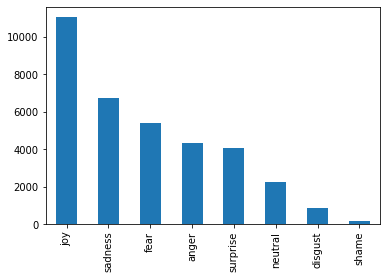

In [17]:
df["Emotion"].value_counts().plot(kind='bar')

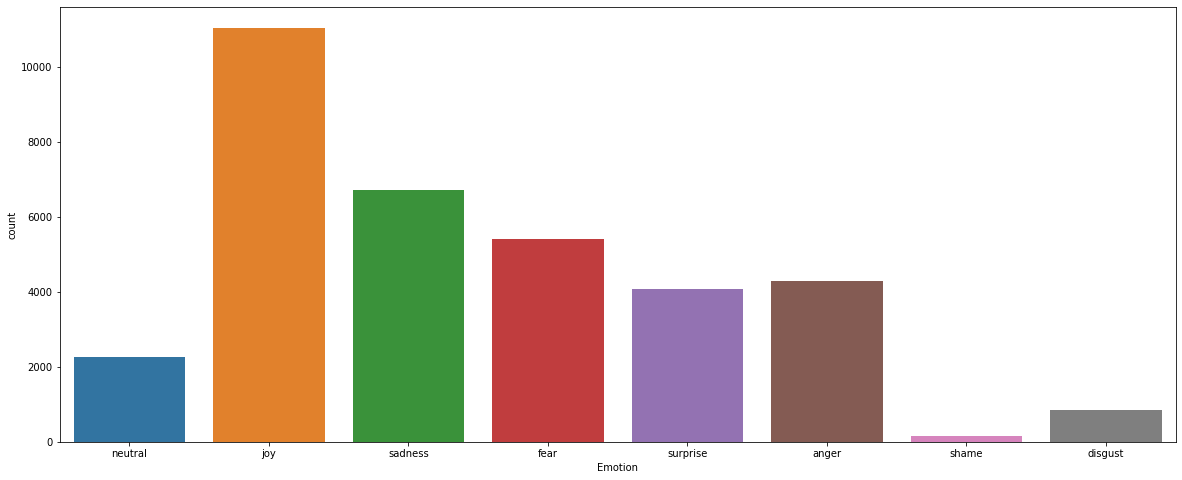

In [18]:
#using seaborn to plot
plt.figure(figsize=(20,8))
sns.countplot(x="Emotion",data=df)
plt.show()

Exploration
1 Sentiment Analysis
2 Keyword Extraction
   Keyword fo each emtion
   Wordcloud


In [19]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [20]:
#Sentiment Analysis
from textblob import TextBlob

In [21]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment>0:
        result="positive"
    elif sentiment<0:
        result="Negative"
    else:
        result="Neutral"
    return result

In [22]:
#Test function
get_sentiment("I love coding")

'positive'

In [23]:
df["Sentiment"]=df["Text"].apply(get_sentiment)

In [24]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [25]:
#compare emotion vs sentiment
df.groupby(["Emotion","Sentiment"]).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          positive     1124
disgust   Negative      325
          Neutral       249
          positive      282
fear      Negative     1534
          Neutral      1843
          positive     2033
joy       Negative     1682
          Neutral      3648
          positive     5715
neutral   Negative      178
          Neutral      1523
          positive      553
sadness   Negative     2630
          Neutral      2127
          positive     1965
shame     Negative       46
          Neutral        50
          positive       50
surprise  Negative      623
          Neutral      1545
          positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

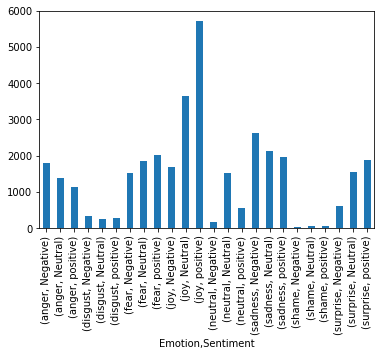

In [26]:
#First Method using Matplotlib
df.groupby(["Emotion","Sentiment"]).size().plot(kind="bar")

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


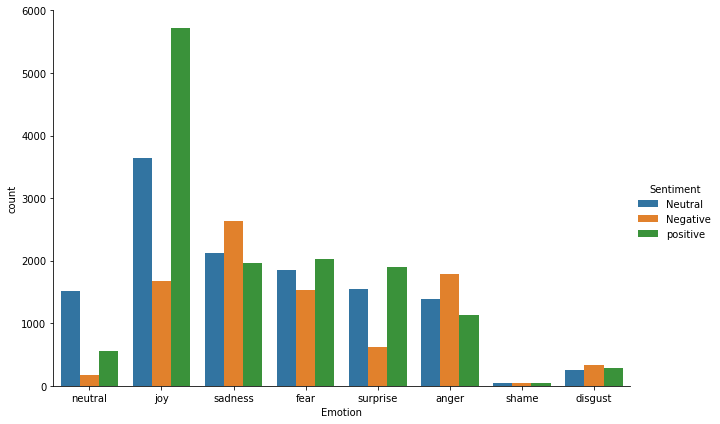

In [27]:
#Using seaborn
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind="count",size=6,aspect=1.5)

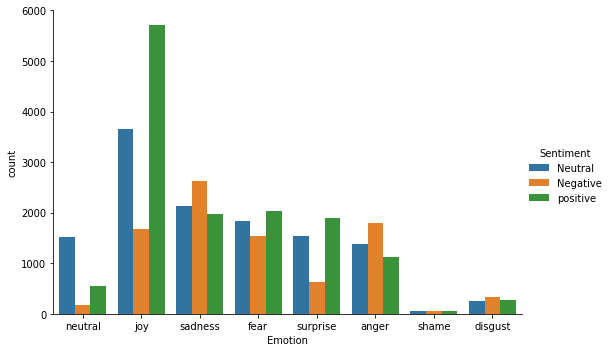

In [28]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind="count",aspect=1.5)

#Text Cleaning
Remove noise
stopwards
special characters
emojis
punctuations


In [29]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [30]:
df['Clean_Text']= df['Text'].apply(nfx.remove_stopwords)

In [31]:
df['Clean_Text']= df['Text'].apply(nfx.remove_punctuations)

In [32]:
df['Clean_Text']= df['Text'].apply(nfx.remove_userhandles)

In [33]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,Why ?
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,have you gift! Hope you like it! It's hand m...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to me..so the world MO...
34789,A man robbed me today .,A man robbed me today .
34790,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu call it JEALOUSY, I call it of #Losing YO..."


##Keyword Extraction
extract most commonest words per class of emotions


In [34]:
from collections import Counter

In [35]:
def extract_keywords(text,num=50):
    tokens =[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [36]:
#List of emotions
emotion_list=df['Emotion'].unique().tolist()

In [37]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [38]:
df[df['Emotion']=='joy']['Clean_Text']

1          Sage Act upgrade on my to do list for tommorow.
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
12       For once in his life , Leopold must have been ...
17         I have a feeling i will fail french #fuckfrench
                               ...                        
34778                   In other news, my mum made EFO.   
34784    ~ As musicas que nois danço com os munitores t...
34785    When I understood that I was admitted to the U...
34786      Tuesday woken up to Oscar and Cornet practice X
34788    The world didnt give it to me..so the world MO...
Name: Clean_Text, Length: 11045, dtype: object

In [39]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [40]:
#joy document
joy_docx=''.join(joy_list)

In [41]:
joy_docx

'Sage Act upgrade on my to do list for tommorow. Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being \' the picture of health \' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .   ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega\'s mas pinaramdam at fil ko ang For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition . I have a feeling i will fail french #fuckfrench Good.Let \' s go now . When I fell in love with \\X\\".  Overnight I felt confidence, self-esteem,    responsible and worthwhile."One could get terribly ecstatic but that 

In [42]:
#Extract keyword
keyword_joy = extract_keywords(joy_docx)

In [43]:
keyword_joy

{'the': 5287,
 'to': 4724,
 'I': 4196,
 'a': 3590,
 'and': 3210,
 'of': 2796,
 'my': 2781,
 'in': 2299,
 '.': 1993,
 'for': 1980,
 'is': 1561,
 ',': 1365,
 'with': 1363,
 'that': 1203,
 'you': 1171,
 'was': 1150,
 'at': 1123,
 'on': 1088,
 'have': 956,
 'me': 947,
 'be': 881,
 'it': 849,
 'this': 758,
 '&amp;': 673,
 'had': 633,
 'all': 604,
 'so': 588,
 'up': 585,
 'day': 577,
 'when': 541,
 'your': 527,
 "I'm": 499,
 'time': 479,
 'from': 476,
 'get': 474,
 'an': 472,
 'not': 469,
 'like': 465,
 'just': 443,
 'about': 434,
 'are': 430,
 'out': 418,
 'The': 410,
 'but': 398,
 'work': 395,
 'Christmas': 388,
 'as': 384,
 'i': 362,
 'When': 361,
 'we': 357}

In [44]:
#Plot
def plot_most_common_words(mydict):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()
                       
                       

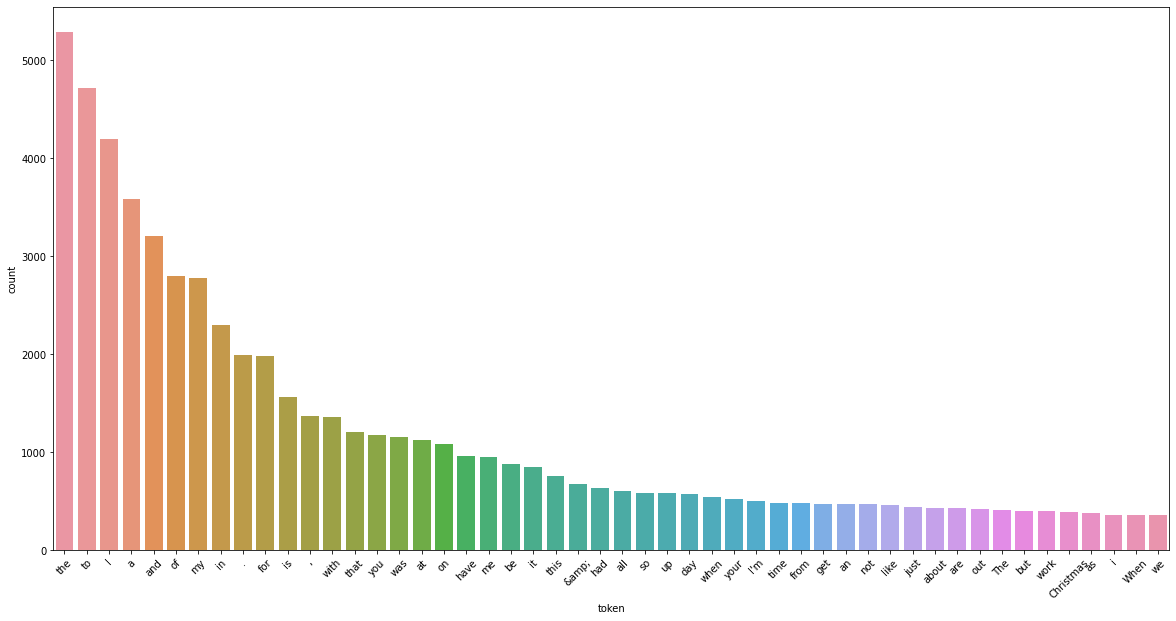

In [45]:
plot_most_common_words(keyword_joy)

##Machine Learning
Naives Bayes
Logistic Regression
KNN
Decision Tree

In [46]:
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [47]:
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [49]:
Xfeatures

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
                               ...                        
34787      have you gift! Hope you like it! It's hand m...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Clean_Text, Length: 34792, dtype: object

In [50]:
ylabels

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

In [51]:
#Vectorizer
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [52]:
#Get features by Name
cv.get_feature_names()

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000calories',
 '000shs',
 '000th',
 '000yr',
 '000ème',
 '00am',
 '00h',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '04',
 '05',
 '0512',
 '05am',
 '06',
 '073',
 '0800',
 '09',
 '0_0',
 '0_o',
 '0l',
 '0ntworpen',
 '0w',
 '10',
 '100',
 '1000',
 '10000th',
 '1000gifts',
 '1000s',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '102',
 '103',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '11',
 '110',
 '110km',
 '111',
 '1111ème',
 '112',
 '116',
 '118',
 '11am',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '123',
 '1250',
 '1252',
 '1260',
 '128',
 '12days',
 '12hours',
 '12hr',
 '12hrstwitter',
 '12km',
 '12th',
 '12x',
 '13',
 '1300',
 '130am',
 '135',
 '13joursdecole',
 '13th',
 '13yo',
 '14',
 '140',
 '1400',
 '1400th',
 '147',
 '14dayz',
 '14h',
 '14th',
 '15',
 '150',
 '1500',
 '1503',
 '1564',
 '15am',
 '15h

In [53]:

# to dense array (numpy)
X.toarray()

MemoryError: Unable to allocate 8.19 GiB for an array with shape (34792, 31585) and data type int64

In [54]:
#  Split Data
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

##Built our Model

In [55]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [56]:
#Accuracy method 1
nv_model.score(X_test,y_test)

0.5643801494539183

In [57]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [58]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype='<U8')

# Make  a single Prediction
 Vectorized our text
 Appplied our model 

In [59]:
sample_text=["I love coding so much"]

In [60]:
vect=cv.transform(sample_text).toarray()

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [61]:
# Make prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [62]:
# Check for Prediction Probability percentage
nv_model.predict_proba(vect)


array([[9.21558415e-03, 2.84856942e-04, 7.17832690e-02, 7.27387611e-01,
        4.84644528e-03, 1.47029739e-01, 5.61813250e-07, 3.94519332e-02]])

In [64]:
# Get all class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [65]:
np.max(nv_model.predict_proba(vect))

0.7273876106120176

In [66]:
def  predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction : {},Prediction score: {}".format(prediction[0],np.max(pred_proba)))
    return  pred_percentage_for_all

In [67]:
predict_emotion(sample_text,nv_model)


Prediction : joy,Prediction score: 0.7273876106120176


C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


{'anger': 0.009215584151633205,
 'disgust': 0.0002848569422544623,
 'fear': 0.07178326900215977,
 'joy': 0.7273876106120176,
 'neutral': 0.004846445281418139,
 'sadness': 0.14702973895905794,
 'shame': 5.618132504642586e-07,
 'surprise': 0.03945193323820767}

In [68]:
predict_emotion(["He hates running all day"],nv_model)

Prediction : joy,Prediction score: 0.7605900888869991


C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


{'anger': 0.018163442516421335,
 'disgust': 9.818463497831887e-05,
 'fear': 0.020646598514249152,
 'joy': 0.7605900888869991,
 'neutral': 0.0003110067051338715,
 'sadness': 0.1824448395170039,
 'shame': 3.924753773234809e-07,
 'surprise': 0.017745446749834252}

##  Model EVALUATION


In [69]:
# Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.50      0.56      1283
     disgust       0.32      0.02      0.04       292
        fear       0.73      0.57      0.64      1645
         joy       0.52      0.86      0.65      3311
     neutral       0.75      0.10      0.18       675
     sadness       0.53      0.54      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.60      0.25      0.35      1181

    accuracy                           0.56     10438
   macro avg       0.51      0.36      0.37     10438
weighted avg       0.59      0.56      0.53     10438



In [70]:
## Confusion Matrix
confusion_matrix(y_test,y_pred_for_nv)

array([[ 644,    1,   62,  354,    2,  206,    0,   14],
       [  38,    6,   27,  141,    0,   74,    0,    6],
       [  78,    3,  936,  371,    6,  175,    1,   75],
       [  67,    3,  104, 2849,    9,  213,    0,   66],
       [  22,    0,   19,  424,   69,  138,    0,    3],
       [  99,    2,   67,  714,    3, 1093,    2,   35],
       [  10,    0,    8,   11,    0,    7,    0,    0],
       [  49,    4,   51,  624,    3,  155,    1,  294]], dtype=int64)

In [71]:
#Plot confusion matrix
metrics.plot_confusion_matrix(nv_model,X_test,y_test)

NameError: name 'metrics' is not defined

## SAVE MODEL


In [72]:
import joblib
model_file = open("emotion_classifier_model_nv_model.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

# MODEL INTERPRETATION
EM5
Lime
Shap


In [76]:
#Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
#Accuracy
lr_model.score(X_test,y_test)

0.6323050392795555

In [78]:
# Single Predict
predict_emotion(sample_text,lr_model)

Prediction : joy,Prediction score: 0.5140541838165259


C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


{'anger': 0.015844497380401373,
 'disgust': 0.005374687907700399,
 'fear': 0.03306980979723695,
 'joy': 0.5140541838165259,
 'neutral': 0.20753295710463857,
 'sadness': 0.1228317296696076,
 'shame': 0.00035287203545416847,
 'surprise': 0.100939262288435}

In [79]:
# Interpret Model
import eli5

In [80]:
# Show the weight for each label /Class
eli5.show_weights(lr_model,top=20)

In [93]:
class_names=ylabels.unique().tolist()

In [105]:
feature_names=cv.get_feature_names()

In [107]:
eli5.show_weights(lr_model,feature_names = feature_names,target_names = class_names)